In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

ruta = "/Users/ferleon/Documents/GitHub/semestre_IV/graphic_visualization/clases/datos/titanic/train.csv"
df = pd.read_csv(ruta)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ¿Qué tipo de datos hay?
Es tabular con atributos item,númericos, categoricos y de texto.
- PassengerId:
    - Es item y no es relevante para el análisis.
- Survived:
    - Es categórico. 0=No sobrevivió, 1=Sobrevivió y si es relevante.
- Pclass:
    - Es numérico ordinal. 1=Primera clase, 2=Segunda clase, 3=Tercera clase y si es relevante.
- Name:
    - Es item y no es relevante para el análisis.
- Sex:
    - Es categórico. 0=Hombre, 1=Mujer y si es relevante.
- Age:
    - Es númerico y cuantitativo. Es relevante.
- SibSp (Siblings/Spouses):
    - Es numérico y cuantitativo. Es relevante.
- Parch (Parents/Children):
    - es númerico y cuantitativo. Es relevante.
- Ticket:
    - Es item y no es relevante para el análisis.
- Fare:
    - Es numérico y cuantitativo. Es relevante. 
- Cabin:
    - Es categorico y tiene datos faltantes. No es relevante para el análisis.
- Embarked:
    - Es categórico. 0=C, 1=Q, 2=S y si es relevante.

# ¿Qué datos tiene faltante?
Edad osea Age tiene 177 datos faltantes, Cabin tiene 687 datos faltantes y Embarked tiene 2 datos faltantes.

In [39]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
# Quitamos las columnas que no nos interesan
df_clean = df.drop(columns=["Name", "Ticket", "Cabin"])


df_clean["Age"].fillna(df_clean["Age"].median(), inplace=True)
df_clean["Embarked"].fillna(df_clean["Embarked"].mode().iloc[0], inplace=True)


print("\nDataset limpio")
print(df_clean.shape)
print(df_clean.isnull().sum())


Dataset limpio
(891, 9)
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


/var/folders/j4/21ypxx3x0019wgj7rqnlm2340000gn/T/ipykernel_39720/1174537193.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["Age"].fillna(df_clean["Age"].median(), inplace=True)
/var/folders/j4/21ypxx3x0019wgj7rqnlm2340000gn/T/ipykernel_39720/1174537193.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

# ¿Cómo se distribuyen las edades de los pasajeros?
Histograma por que es un dato cuantitativo.

# ¿Qué tan variable fue la tarifa vs clase?
Una grafica de violin por que es un dato cuantitativo y categórico.

# ¿Cuántos pasajetos viajaban en cada clase?
Una grafica de barras por que es un dato categórico.

# ¿Cuántos pasajeros sobrevivieron por clase?
Una grafica de barras por que es un dato categórico.

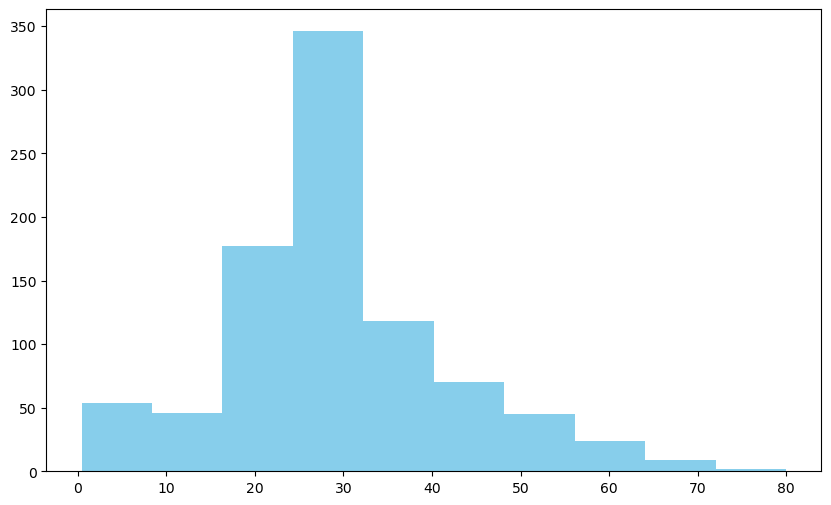

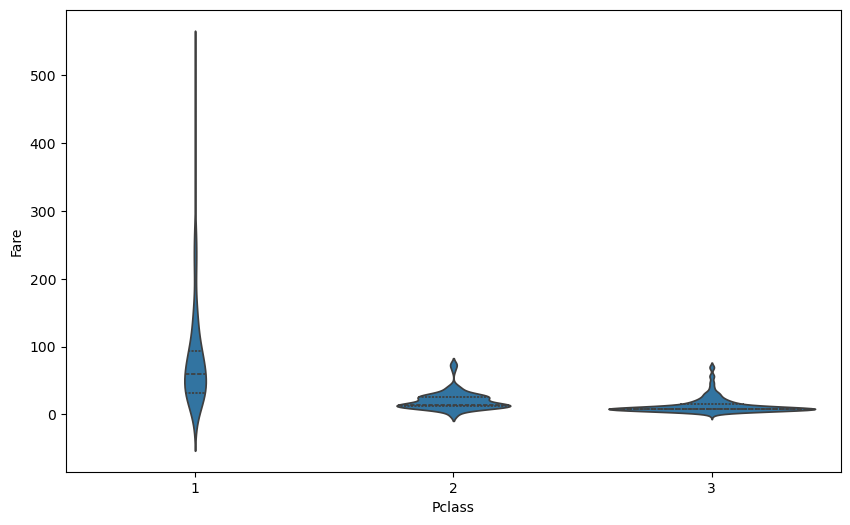

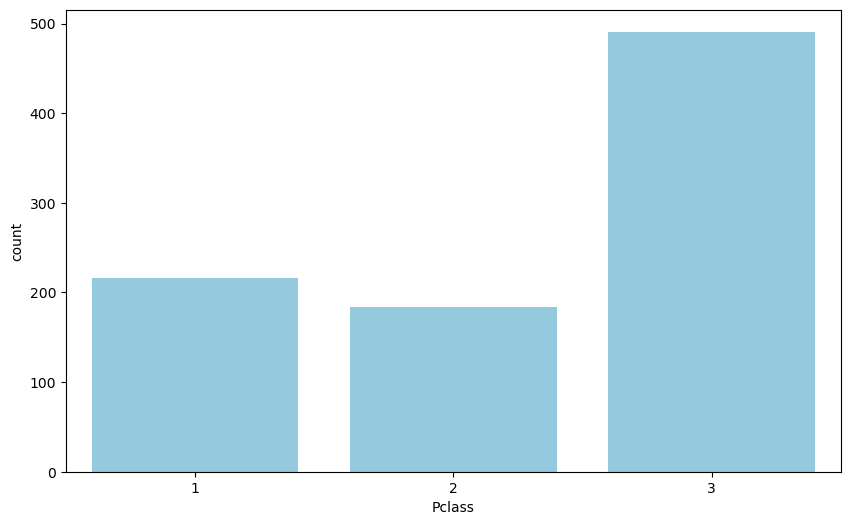

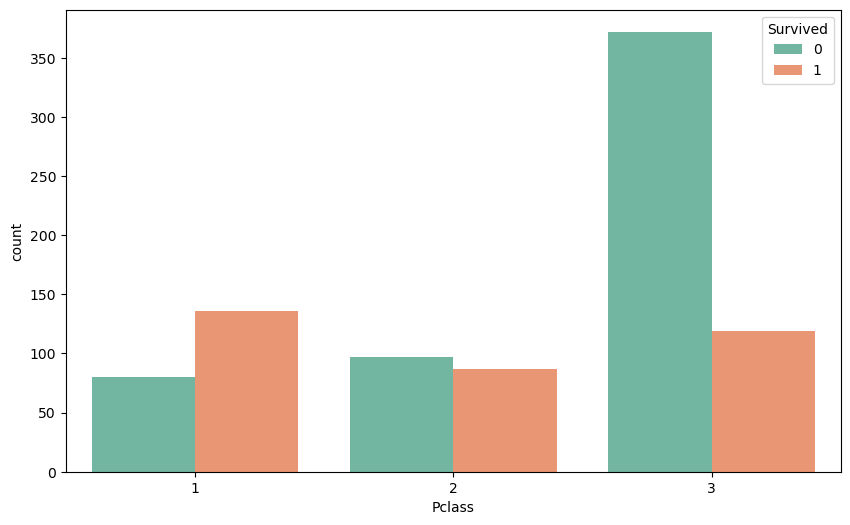

In [41]:
# 
plt.figure(figsize=(10, 6))
plt.hist(df_clean["Age"], color="skyblue")
plt.show()

# Grafica de violin para visualizar la variabilidad de la tarifa (Fare) según la clase (Pclass)
import seaborn as sns  # Solo importa si no se ha importado previamente en este Notebook

plt.figure(figsize=(10, 6))
sns.violinplot(x="Pclass", y="Fare", data=df_clean, inner="quartile")
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x="Pclass", data=df_clean, color="skyblue")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x="Pclass", hue="Survived", data=df_clean, palette="Set2")
plt.show()


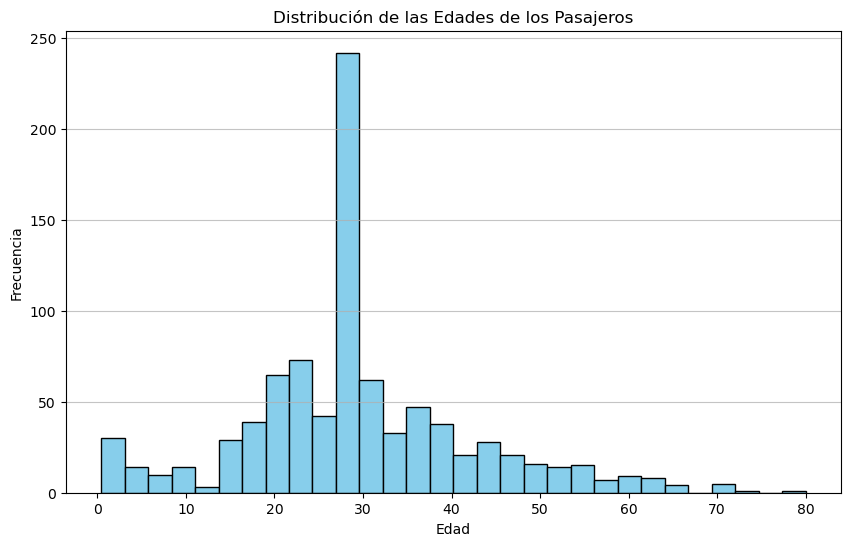

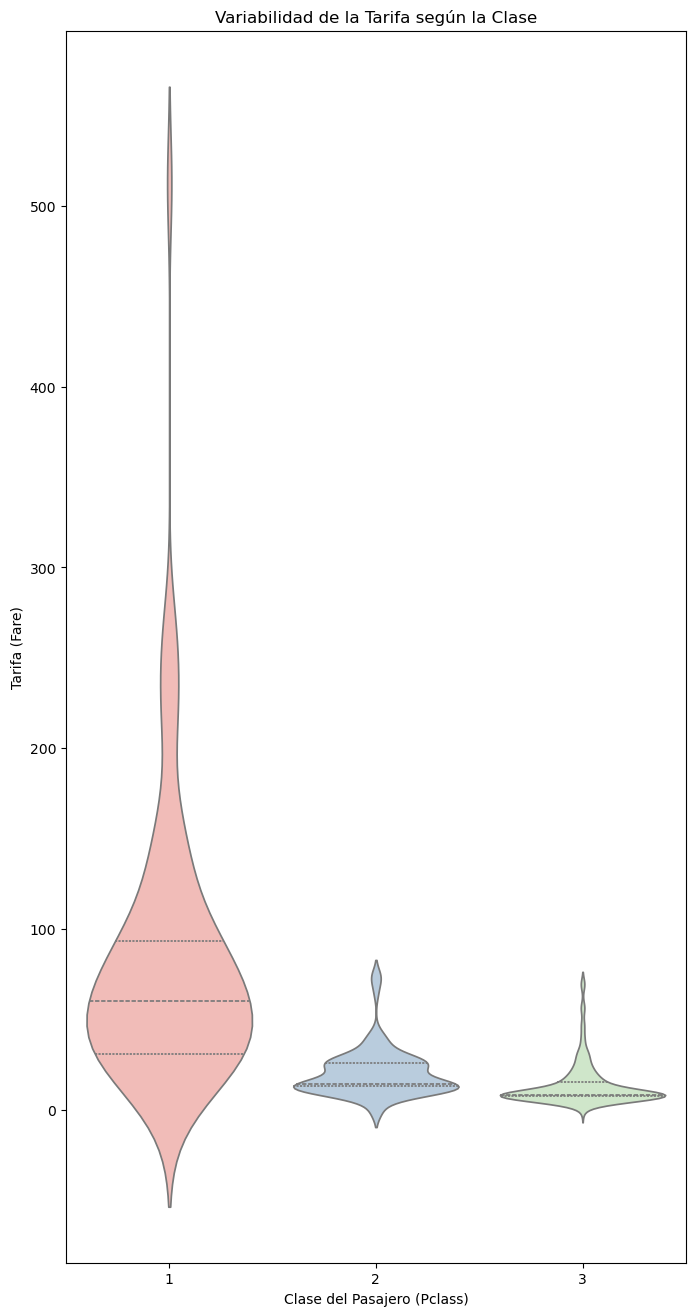

/var/folders/j4/21ypxx3x0019wgj7rqnlm2340000gn/T/ipykernel_39720/3139541436.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=df_clean, palette="Blues")


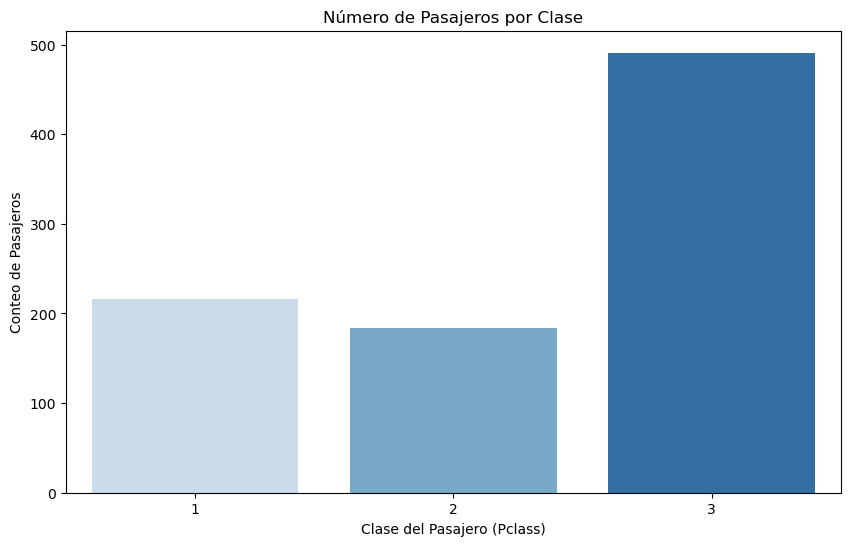

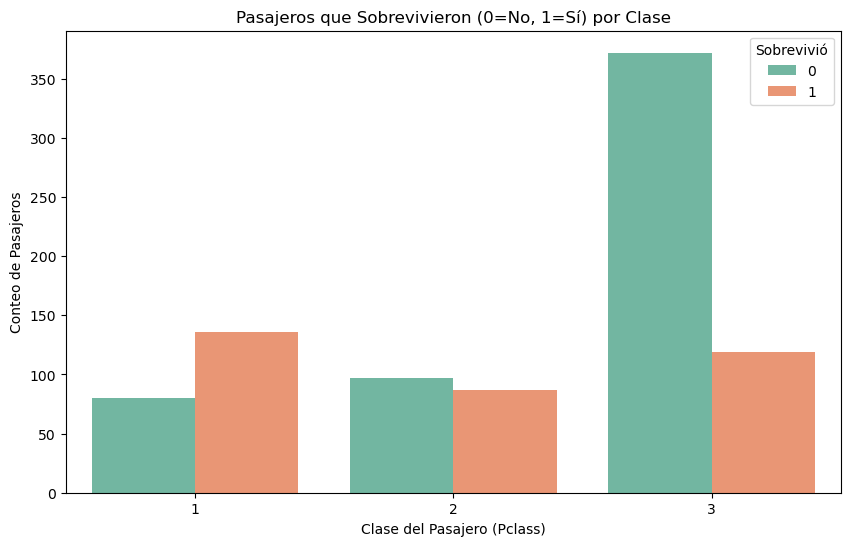

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(df_clean["Age"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribución de las Edades de los Pasajeros")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(axis="y", alpha=0.75)
plt.show()


plt.figure(figsize=(10, 6))
sns.violinplot(x="Pclass", y="Fare", hue="Pclass", data=df_clean, inner="quartile", palette="Pastel1", dodge=False, legend=False)
plt.title("Variabilidad de la Tarifa según la Clase")
plt.xlabel("Clase del Pasajero (Pclass)")
plt.ylabel("Tarifa (Fare)")
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x="Pclass", data=df_clean, palette="Blues")
plt.title("Número de Pasajeros por Clase")
plt.xlabel("Clase del Pasajero (Pclass)")
plt.ylabel("Conteo de Pasajeros")
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x="Pclass", hue="Survived", data=df_clean, palette="Set2")
plt.title("Pasajeros que Sobrevivieron (0=No, 1=Sí) por Clase")
plt.xlabel("Clase del Pasajero (Pclass)")
plt.ylabel("Conteo de Pasajeros")
plt.legend(title="Sobrevivió", loc="upper right")
plt.show()